In [142]:
# Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Importing Dataset

In [143]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [144]:
pd.set_option('display.max_columns', None) # too see all the columns
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


###  Data Cleaning

In [145]:
print("There are", len(data), "observations and", len(data.columns), "variables in the dataset.")

There are 2240 observations and 29 variables in the dataset.


In [146]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. As you can see from the outputs, there are 2240 observations in the dataset. That indicates, Income variable has 2216 observations and 24 NA values.
2. Z_CostContact and Z_Revenue variables have constant numbers as 3 and 11. These variables will be excluded. 
3. Dt_Customers is in object class. It should be in DateTime format. 
4. Furthermore, there exists categorical features such as Education, Marital_Status Variables. Later, they will be converted to numeric class.

<AxesSubplot:>

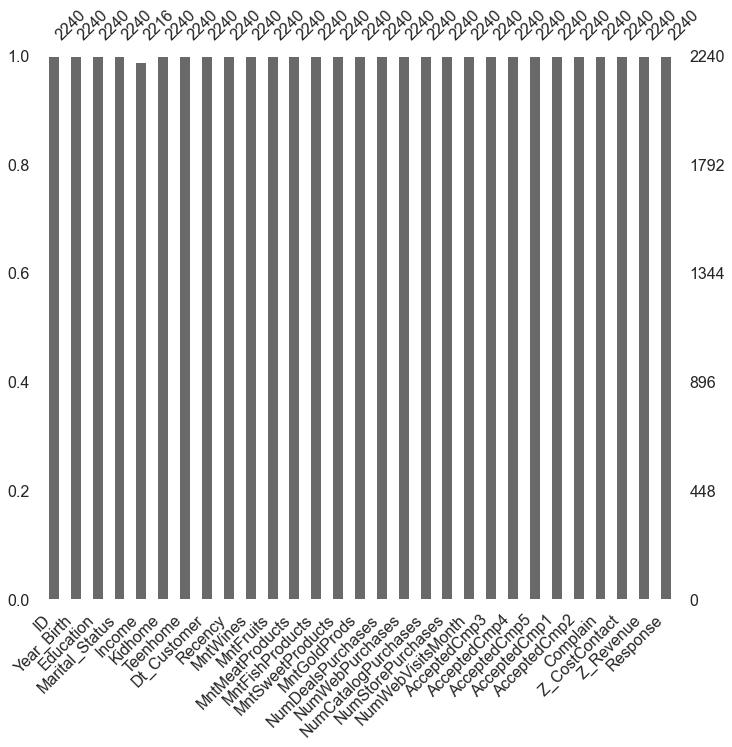

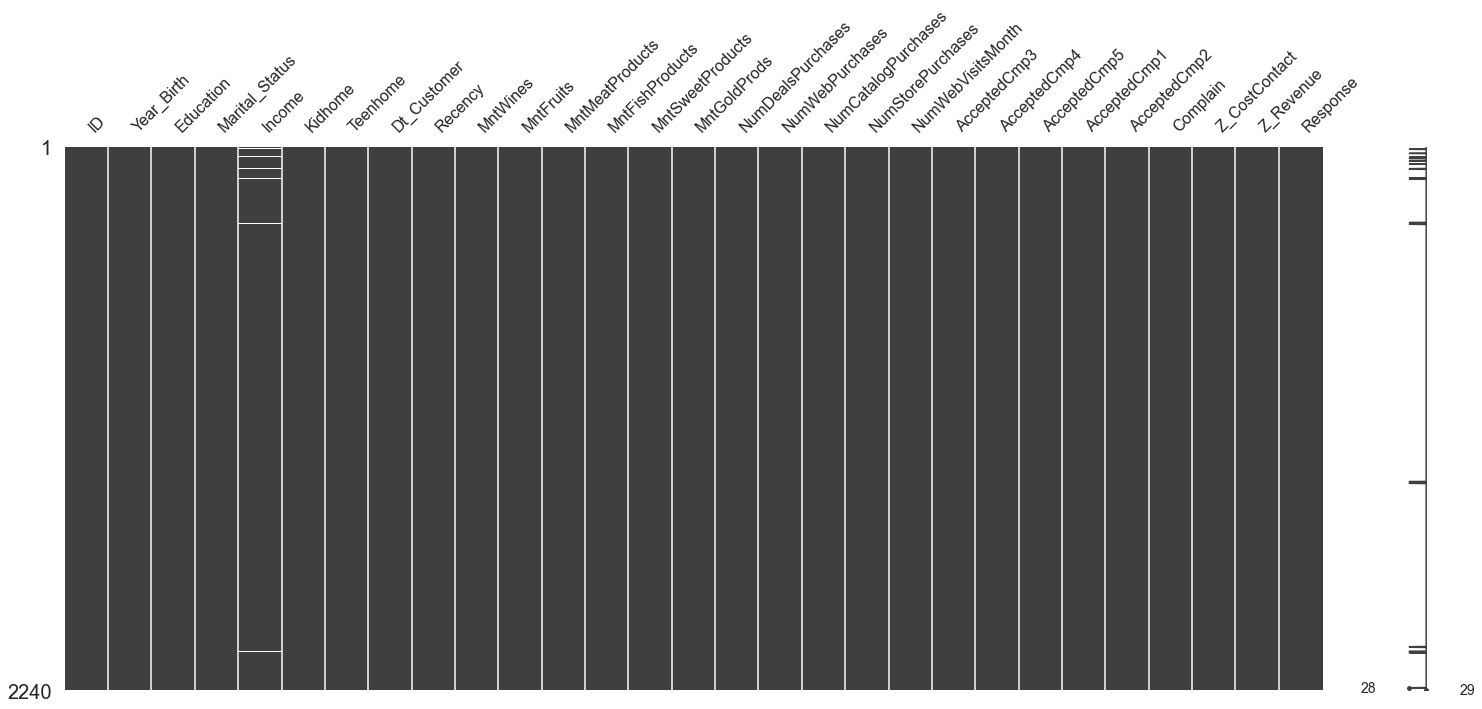

In [148]:
# Visualising the missing values
import missingno as mn

plt.subplot(1, 2, 1) # row 1, col 2 index 1
mn.bar(data) # shows which variable has NAs
mn.matrix(data) # shows which Customer's data is missing


In [149]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

The mean value (52247.25) and median value (50th percentile which is 51381.50) of Income are close to each other.

In [150]:
# Mean Imputation for Income variable
data['Income']=data['Income'].fillna(data['Income'].mean())

In [151]:
data.isna().any() # There is no NA values.

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [152]:
# Dropping the variables Z_CostContact & Z_Revenue
data = data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### Preprocessing

In [153]:
# Change date format
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [154]:
data.Dt_Customer.describe()

C:\Users\KAYABE~1\AppData\Local\Temp/ipykernel_9164/2968229423.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

While the registration date of the newest customer in the records is 2014-12-06, the registration date of the oldest customer in the records is 2012-01-08.

In [155]:
import datetime

In [156]:
data["Customer_date"]= (datetime.datetime.now()-data["Dt_Customer"]).dt.days

In [157]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_date
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,3701
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2855
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3202
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2795
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3051


Now, Customer_date is a numeric value where 0 represents the day is today. As the date approaches today, the value of the variable approaches zero.

In [158]:
data[data.duplicated(['ID'])].size

0

There is no duplication in the data.

In [159]:
# Adding new variables
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Accepted']= data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

In [160]:
# Marital Status variable categories
data['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [161]:
# Renaming
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('YOLO', 'Single')

In [162]:
import plotly.express as px

In [163]:
# Marital Status & Income
# fig = px.box(data, x="Marital_Status", y="Income")
# fig.show()

# Because of the outliers in Income, the graph doesn't represent the distribution well. 

In [164]:
data['Marital_Status'].value_counts() # In relationship=1444 & Single=796

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [165]:
# Education variable categories
data['Education'].value_counts()  

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [166]:
data['Education'] = data['Education'].str.replace('2n Cycle', 'Master')

# the 2nd cycle is considered as Master's degree.

In [167]:
#Age of customer today 
from datetime import datetime

data["Age"] = 2022-data["Year_Birth"]

In [168]:
# Renaming columns
data = data.rename(columns={"MntFruits":"Fruits","MntWines": "Wines","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","MntMeatProducts":"Meat"})


In [169]:
# Removing some variables
data = data.drop(columns=[
       'ID', 'Year_Birth', 'Kidhome', 'Dt_Customer', 'Teenhome'])

In [170]:
pd.set_option('display.max_columns', None) # too see all the columns
data.head()


,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,3701,0,1617,0,25,65
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2855,2,27,0,6,68
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3202,0,776,0,21,57
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2795,1,53,0,8,38
4,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3051,1,422,0,19,41


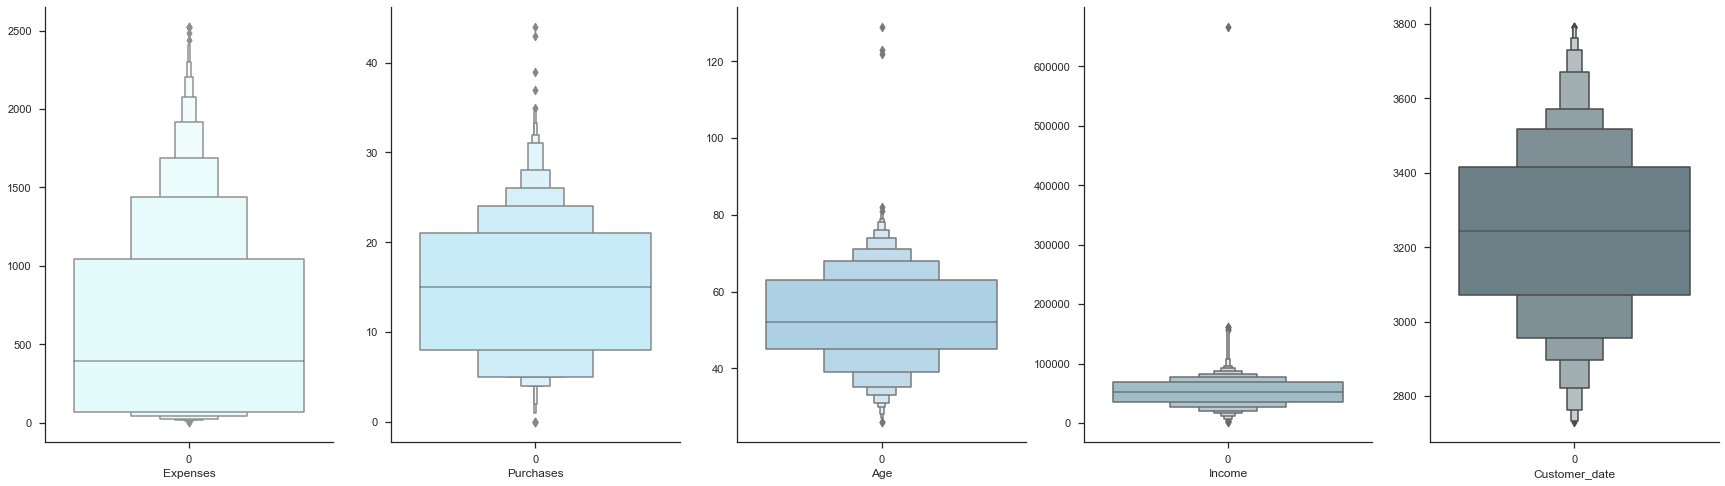

In [171]:
#examine the boxplots of different features
features= ["Expenses", "Purchases", "Age", "Income", "Customer_date"]
palette = ["#E0FFFF","#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

Age, Income & Purchases seem to have outlier problems. 

In [172]:
len(data) #2240


2240

In [173]:
# Dropping the Outliers
from scipy import stats

In [174]:
# Income
data = data[(np.abs(stats.zscore(data['Income'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

In [175]:
# Age
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

In [176]:
# Purchases
data = data[(np.abs(stats.zscore(data['Purchases'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

Any z-score greater than 3 or less than -3 is considered to be an outlier. 

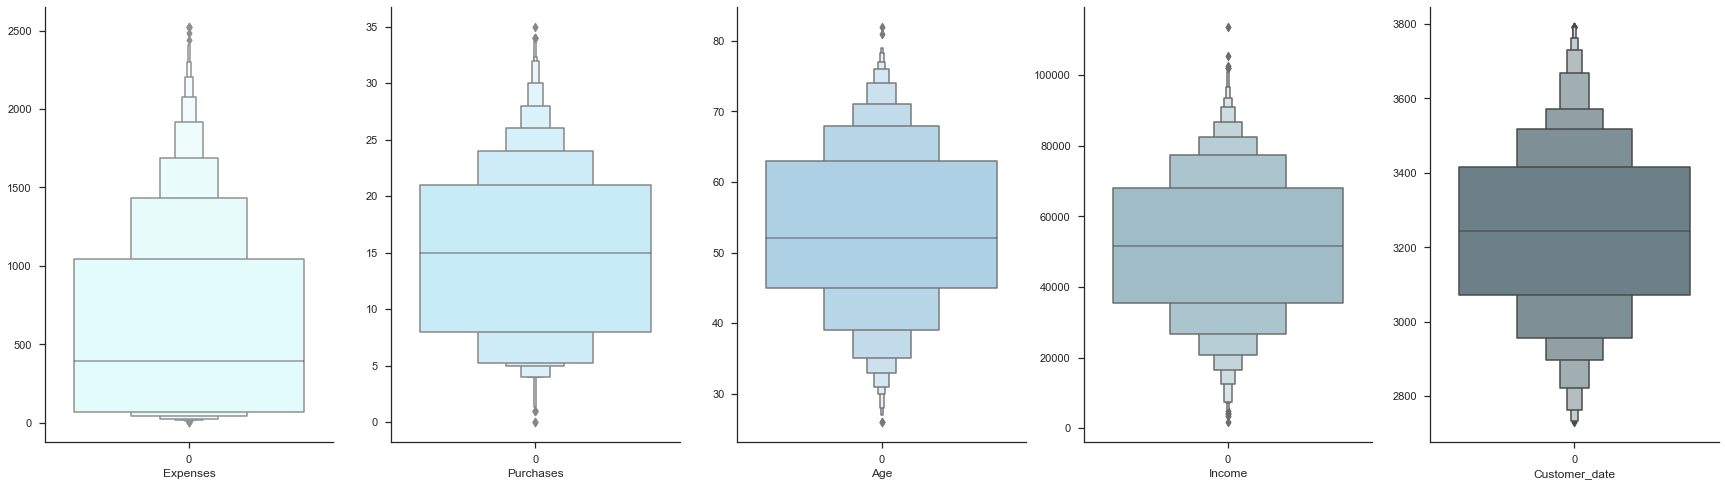

In [177]:
#examine the boxplots of different features
features= ["Expenses", "Purchases", "Age", "Income", "Customer_date"]
palette = ["#E0FFFF","#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

In [178]:
len(data) #2227

2227

The number of observations decreased from 2240 to 2227. Change in Outliers can be also seen from the boxplots.

(array([ 95., 453., 569., 537., 461.,  88.,   5.,   0.,   0.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1730. ,  18353.4,  34976.8,  51600.2,  68223.6,  84847. ,
        101470.4, 118093.8, 134717.2, 151340.6, 167964. , 184587.4,
        201210.8, 217834.2, 234457.6, 251081. , 267704.4, 284327.8,
        300951.2, 317574.6, 334198. , 350821.4, 367444.8, 384068.2,
        400691.6, 417315. , 433938.4, 450561.8, 467185.2, 483808.6,
        500432. , 517055.4, 533678.8, 550302.2, 566925.6, 583549. ,
        600172.4, 616795.8, 633419.2, 650042.6, 666666. ]),
 <BarContainer object of 40 artists>)

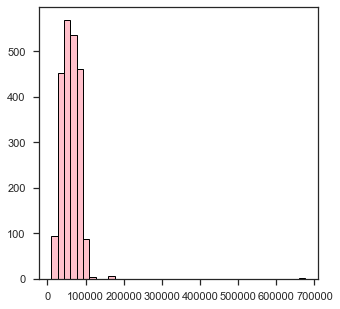

In [179]:
# Income before Outlier reduction
data_new = pd.read_csv("marketing_campaign.csv", sep="\t")

plt.figure(figsize=(5,5))

plt.hist(data_new['Income'], bins=40, align='right', color='pink', edgecolor='black') 

(array([  4.,   6.,  18.,   8.,  26.,  35.,  50.,  74.,  70.,  71.,  91.,
        101., 104., 103.,  95.,  96.,  83.,  91., 112.,  89.,  84.,  96.,
        102.,  83.,  99.,  75.,  78.,  79.,  79.,  46.,  27.,  21.,  14.,
         10.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1730. ,   4530.1,   7330.2,  10130.3,  12930.4,  15730.5,
         18530.6,  21330.7,  24130.8,  26930.9,  29731. ,  32531.1,
         35331.2,  38131.3,  40931.4,  43731.5,  46531.6,  49331.7,
         52131.8,  54931.9,  57732. ,  60532.1,  63332.2,  66132.3,
         68932.4,  71732.5,  74532.6,  77332.7,  80132.8,  82932.9,
         85733. ,  88533.1,  91333.2,  94133.3,  96933.4,  99733.5,
        102533.6, 105333.7, 108133.8, 110933.9, 113734. ]),
 <BarContainer object of 40 artists>)

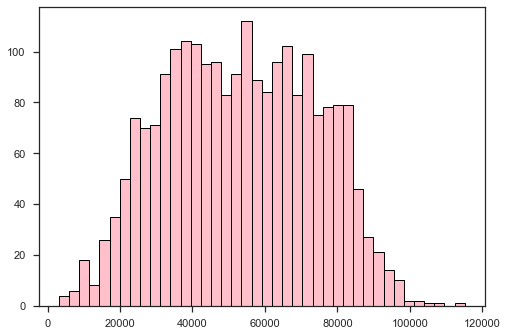

In [180]:
# Income after Outlier reduction
plt.hist(data['Income'], bins=40, align='right', color='pink', edgecolor='black') 

In [181]:
# Marital Status & Income: After outlier elimination in Income
fig = px.box(data, x="Marital_Status", y="Income")
fig.show()

By looking at the distribution of income by marital status, single people have the widest income range, while widows have the narrowest income range.

In [182]:
# Renaming for specifillay KNN since it gives better result when Marital_Status has 2 groups only
data['Marital_Status'] = data['Marital_Status'].str.replace('Married', 'In relationship')
data['Marital_Status'] = data['Marital_Status'].str.replace('Together', 'In relationship')
data['Marital_Status'] = data['Marital_Status'].str.replace('Divorced', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Widow', 'Single')

In [183]:
# Variable which indicates for the members in the house

data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "In relationship":2})+ data["Kids"]

### Exploratory Data Analysis

In [184]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [185]:
correlation_data = data.loc[:, ~data.columns.isin(['NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1' ])]

<AxesSubplot:>

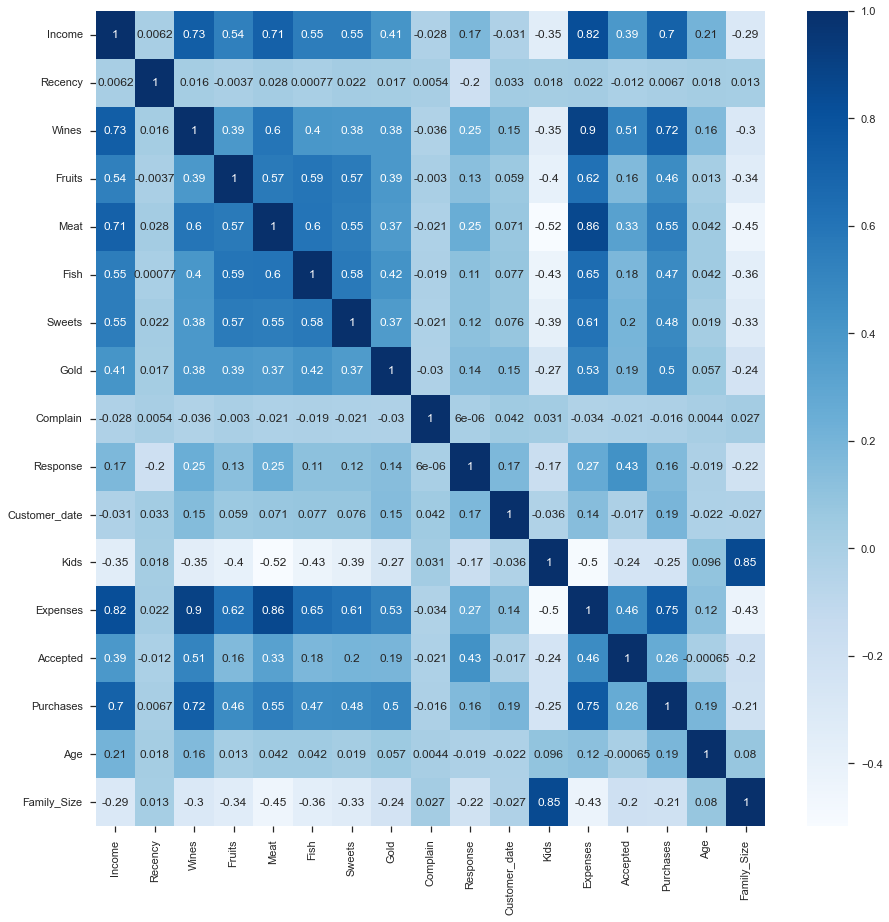

In [186]:
import seaborn as sb
plt.figure(figsize=(15, 15))
corr = correlation_data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In the Correlation Heatmap, there are many high correlation values. For example, it can be said that Income has strong relationship with Wines, Meat, Expenses & Purchases with the correlation value more than 0.7.

On the other hand, there are negative correlation values between Family size and all the products (Wines, Fruits, Meat, Fish, Sweets, Gold). That means, they have negative relationship between them.

(array([  4.,   6.,  18.,   8.,  26.,  35.,  50.,  74.,  70.,  71.,  91.,
        101., 104., 103.,  95.,  96.,  83.,  91., 112.,  89.,  84.,  96.,
        102.,  83.,  99.,  75.,  78.,  79.,  79.,  46.,  27.,  21.,  14.,
         10.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1730. ,   4530.1,   7330.2,  10130.3,  12930.4,  15730.5,
         18530.6,  21330.7,  24130.8,  26930.9,  29731. ,  32531.1,
         35331.2,  38131.3,  40931.4,  43731.5,  46531.6,  49331.7,
         52131.8,  54931.9,  57732. ,  60532.1,  63332.2,  66132.3,
         68932.4,  71732.5,  74532.6,  77332.7,  80132.8,  82932.9,
         85733. ,  88533.1,  91333.2,  94133.3,  96933.4,  99733.5,
        102533.6, 105333.7, 108133.8, 110933.9, 113734. ]),
 <BarContainer object of 40 artists>)

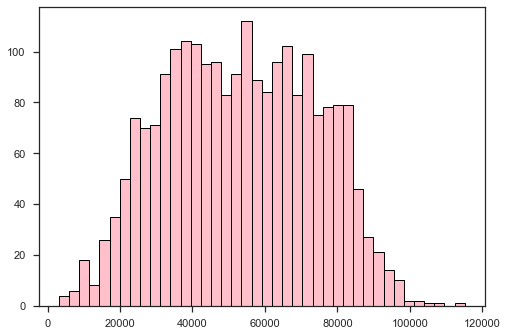

In [187]:
# Income
plt.hist(data['Income'], bins=40, align='right', color='pink', edgecolor='black')

(array([  7.,   3.,  18.,  15.,  18.,  59.,  27.,  74.,  38.,  42.,  83.,
         39., 129.,  50.,  88., 151.,  73., 165.,  77.,  71.,  94.,  50.,
        116.,  45.,  44.,  85.,  51.,  96.,  55.,  49.,  85.,  52.,  72.,
         29.,  21.,  32.,   8.,  14.,   0.,   2.]),
 array([26. , 27.4, 28.8, 30.2, 31.6, 33. , 34.4, 35.8, 37.2, 38.6, 40. ,
        41.4, 42.8, 44.2, 45.6, 47. , 48.4, 49.8, 51.2, 52.6, 54. , 55.4,
        56.8, 58.2, 59.6, 61. , 62.4, 63.8, 65.2, 66.6, 68. , 69.4, 70.8,
        72.2, 73.6, 75. , 76.4, 77.8, 79.2, 80.6, 82. ]),
 <BarContainer object of 40 artists>)

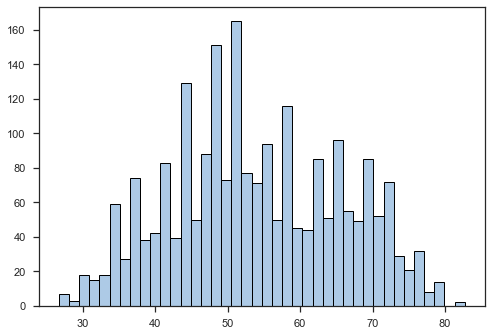

In [188]:
# Age 
plt.hist(data['Age'], bins=40, align='right', color='#adcae6', edgecolor='black')

In [189]:
data.groupby(['Age']).agg({'Age':'count'}).head()

,Age
Age,
26,2
27,5
28,3
29,5
30,13


(array([544., 231., 113.,  69.,  95.,  49.,  82.,  65.,  40.,  48.,  50.,
         44.,  53.,  42.,  58.,  62.,  52.,  50.,  68.,  38.,  35.,  44.,
         29.,  36.,  34.,  32.,  32.,  20.,  22.,  11.,  24.,  11.,   9.,
         14.,   4.,   5.,   4.,   3.,   1.,   4.]),
 array([   5.,   68.,  131.,  194.,  257.,  320.,  383.,  446.,  509.,
         572.,  635.,  698.,  761.,  824.,  887.,  950., 1013., 1076.,
        1139., 1202., 1265., 1328., 1391., 1454., 1517., 1580., 1643.,
        1706., 1769., 1832., 1895., 1958., 2021., 2084., 2147., 2210.,
        2273., 2336., 2399., 2462., 2525.]),
 <BarContainer object of 40 artists>)

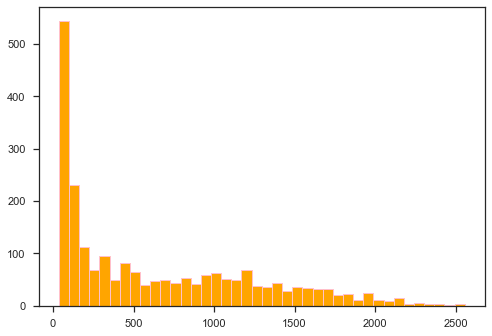

In [190]:
# Expenses (Total amount spent on products in last 2 years)
plt.hist(data['Expenses'], bins=40, align='right', color='orange', edgecolor='pink')

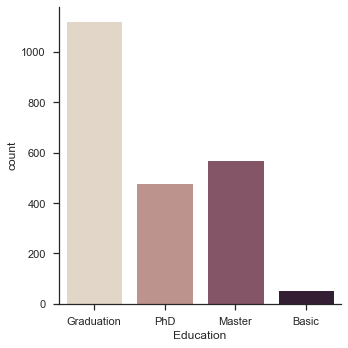

In [191]:
# Education
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
              
sns.catplot(x="Education", kind="count", palette="ch:.25", data=data)

In [192]:
import plotly.express as px

In [193]:
fig =  px.pie (data, names = "Education", hole = 0, color_discrete_sequence=px.colors.sequential.Mint)
fig.show ()

In [194]:
# Education & Income
fig = px.box(data, x="Education", y="Income")
fig.show()

35.6% of the customer are single whereas more 64.4% are in relationship.

,Complain
Complain,
0,2207
1,20


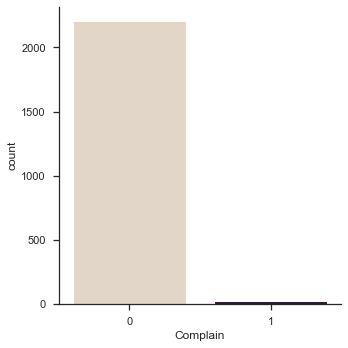

In [195]:
# Complain
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Complain", kind="count", palette="ch:.25", data=data)

data.groupby(['Complain']).agg({'Complain':'count'})

,Response
Response,
0,1893
1,334


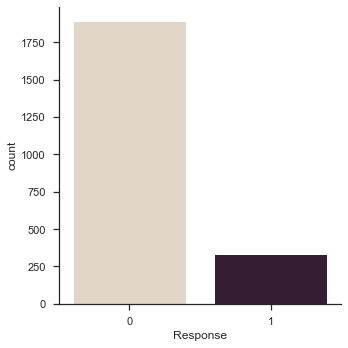

In [196]:
# Response
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=data)

data.groupby(['Response']).agg({'Response':'count'})

Complain variable will not be included as only 20 out of 2227 customers complained.

In [197]:
# Removing Complain variable
data = data.drop(columns=['Complain'])

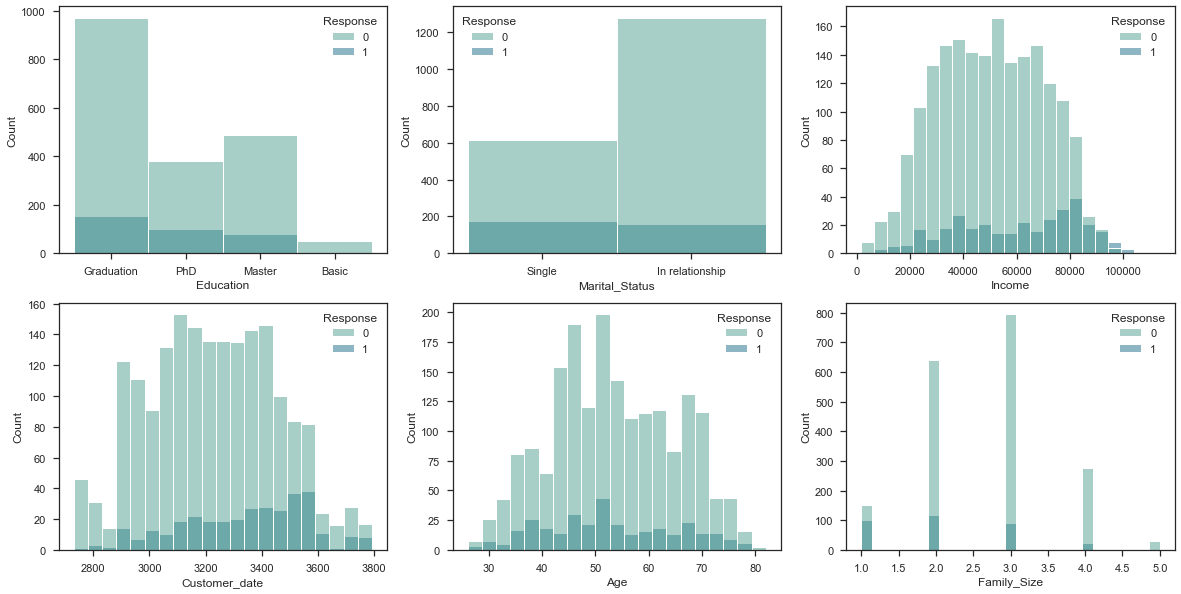

In [198]:
# Distribution of variables by 'Response' variable
data1 = data[['Education','Marital_Status','Income','Customer_date', 'Age', 'Family_Size','Response']]

plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = data1.columns

a = 0

for i in cols[0:6]:
  sns.histplot(data = data1, x = i, hue = 'Response', ax = axes[a], 
               palette = 'crest')
  a= a+1

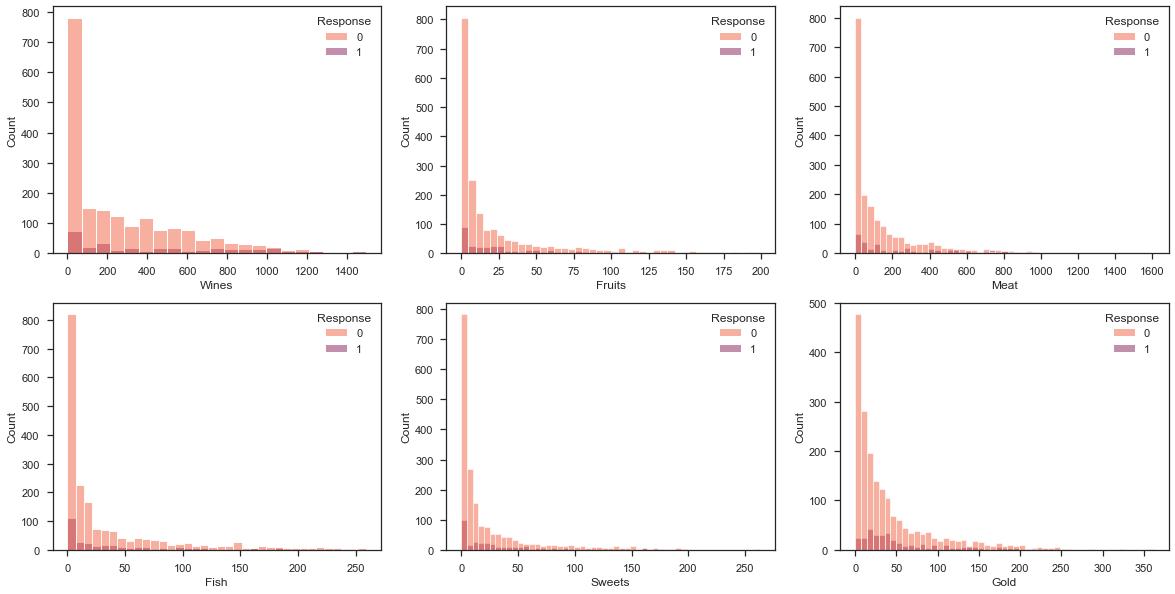

In [199]:
# Distribution of Product variables by 'Response' variable
data2=data[['Wines','Fruits','Meat','Fish','Sweets','Gold','Response']]

plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
cols2 = data2.columns
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0


for i in cols2[0:6]:
  sns.histplot(data = data2, x = i, hue = 'Response', ax = axes[a], 
               palette = 'rocket_r')
  a= a+1

In [200]:
# Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [201]:
encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)
data["Marital_Status"]= data[["Marital_Status"]].apply(encoder.fit_transform)

#hot encode marital_status
data = pd.get_dummies(data)

#check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2227 non-null   int32  
 1   Marital_Status       2227 non-null   int32  
 2   Income               2227 non-null   float64
 3   Recency              2227 non-null   int64  
 4   Wines                2227 non-null   int64  
 5   Fruits               2227 non-null   int64  
 6   Meat                 2227 non-null   int64  
 7   Fish                 2227 non-null   int64  
 8   Sweets               2227 non-null   int64  
 9   Gold                 2227 non-null   int64  
 10  NumDealsPurchases    2227 non-null   int64  
 11  NumWebPurchases      2227 non-null   int64  
 12  NumCatalogPurchases  2227 non-null   int64  
 13  NumStorePurchases    2227 non-null   int64  
 14  NumWebVisitsMonth    2227 non-null   int64  
 15  AcceptedCmp3         2227 non-null   i

# KNN

In [202]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Response"],axis = 1),),
        columns=['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Customer_date', 'Kids', 'Expenses', 'Accepted', 'Purchases', 'Age', 'Family_Size'])

Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance). It makes the continous variables all equally important to the analysis.

In [203]:
y = data.Response

In [204]:
#Stratified train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)



It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.This is called a stratified train-test split.

In [205]:
X_train['Response'] = y_train

,Response
Response,
0,1261
1,223


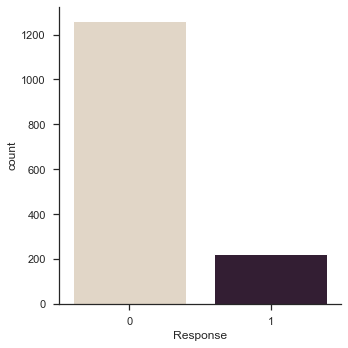

In [206]:
# Oversampling with SMOTE for Train Set
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=X_train)

X_train.groupby(['Response']).agg({'Response':'count'})

In [207]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [208]:
os = SMOTE(random_state=0, k_neighbors=5)
os = ADASYN(random_state=0,n_neighbors=5)
os_X,os_y =os.fit_resample(X_train, X_train.Response)

,Response
Response,
0,1261
1,1286


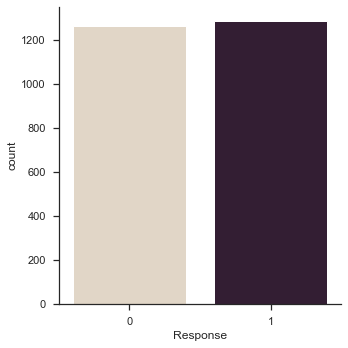

In [209]:
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=os_X)
os_X.groupby(['Response']).agg({'Response':'count'})

In [210]:
os_X

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Response
0,0.401429,-0.743639,1.771559,-0.867014,-0.421782,-0.662628,1.454365,-0.688097,2.392507,0.593091,-0.704561,0.685346,0.866088,0.674835,1.518352,-0.281021,3.512169,3.570282,3.803325,-0.116855,1.411884,0.064505,0.398225,3.973783,0.679713,-0.778522,0.446011,1
1,1.593405,1.344739,0.834001,0.825736,-0.365360,-0.612335,-0.532904,-0.377063,-0.342279,-0.462900,-0.704561,-0.396600,-0.591794,0.366177,-1.381978,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-0.288426,0.064505,-0.535826,-0.439990,-0.375237,0.844296,-0.656394,0
2,-0.790547,-0.743639,-1.589886,-1.177928,-0.810799,-0.662628,-0.721948,-0.267286,-0.560094,-0.501299,-0.704561,-1.117898,-0.956265,-0.559799,0.275354,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.628450,-1.265607,-0.865491,-0.439990,-1.166449,-1.803459,-0.656394,0
3,0.401429,-0.743639,-0.099086,0.549369,-0.781103,-0.260284,-0.625121,-0.468543,-0.172867,-0.693298,-0.704561,-0.757249,-0.591794,-0.559799,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-1.480796,-1.265607,-0.795562,-0.439990,-0.902711,0.246416,-0.656394,0
4,1.593405,-0.743639,1.136623,0.860282,1.921226,-0.360870,0.071115,0.171821,-0.366480,-0.616498,-0.166106,0.324697,0.501618,0.983494,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.322824,0.064505,1.015931,-0.439990,0.679713,0.844296,0.446011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0.066339,1.344739,1.076059,0.557144,0.499629,-0.234433,0.545434,2.038689,2.647452,0.500796,-0.704561,0.583960,0.342068,0.404600,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,1.611542,-0.309418,0.872650,-0.439990,0.337594,0.737620,-0.966303,1
2543,-0.790547,1.344739,1.452950,-1.173169,0.507178,-0.052419,2.415356,0.332300,3.805958,0.539362,-0.704561,0.622478,1.467961,0.527592,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.420647,-1.265607,1.491925,-0.439990,0.811582,-0.247242,-1.758799,1
2544,-0.790547,1.344739,0.708653,-0.350138,0.761956,0.461643,1.009041,1.156801,1.596611,0.896155,-0.704561,1.402076,0.321690,0.370086,-0.348769,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.946934,-1.265607,1.114965,-0.439990,0.614614,0.820510,-1.758799,1
2545,-0.179839,1.344739,1.027209,0.207540,0.347528,-0.104595,0.809214,1.891320,2.532490,0.334252,-0.704561,0.509475,0.492616,0.659588,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,1.343945,-0.584126,0.855457,-0.439990,0.473768,0.596500,-1.193983,1


In [211]:
X_train = os_X.drop("Response",axis = 1)

In [212]:
y_train = os_y # Response

In [213]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [214]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.68590498625835 % and k = [1]


In [215]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.52220726783311 % and k = [2]


C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



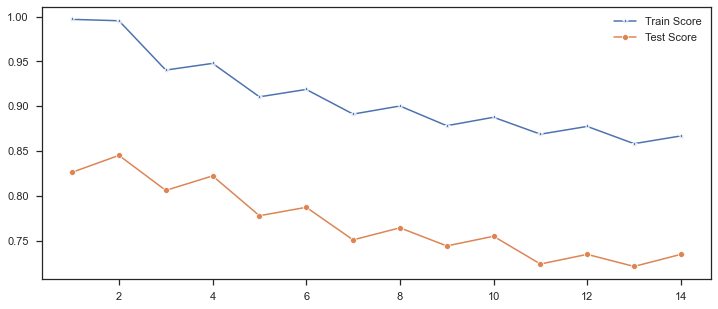

In [216]:
# Result Visual
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 2, therefore 2 is used for the final model

In [217]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.845222072678331

### Model Performance Analysis

###### 1. Confusion Matrix

In [218]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,568,64,632
1,51,60,111
All,619,124,743


In [219]:
#Accuracy

(568+60)/(743)

0.845222072678331

Text(0.5, 22.5, 'Predicted label')

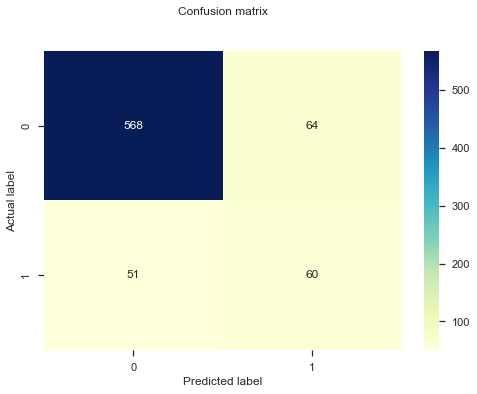

In [220]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###### 2. Classification Report

1. Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)
----------------------------
2. Recall Score
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)
----------------------------
3. F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

In [221]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       632
           1       0.48      0.54      0.51       111

    accuracy                           0.85       743
   macro avg       0.70      0.72      0.71       743
weighted avg       0.85      0.85      0.85       743



In [222]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

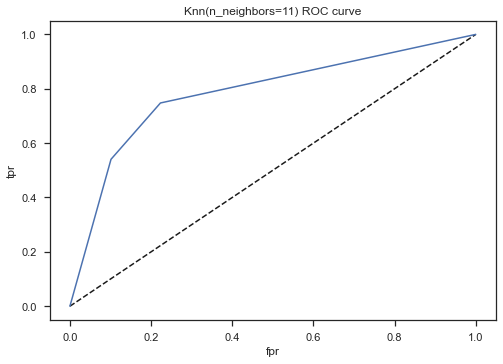

In [223]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [224]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7847602349184628

###### Hyper Parameter optimization

In [225]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8715755529802992
Best Parameters: {'n_neighbors': 27}


# KNN With Clustering Attribute Without PCA

In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import KMeans
from sklearn.cluster import KMeans


###### Elbow Method

In [227]:
# Standardization

clus_data = data.copy()

for i in clus_data.select_dtypes(exclude='object').columns:
    clus_data.loc[:, i] = StandardScaler().fit_transform(np.array(clus_data[[i]]))

clus_data.shape
# Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance)

(2227, 28)

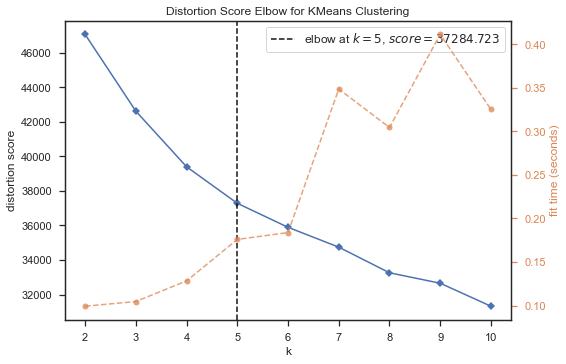

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [228]:
# Elbow Method is used for finding the best K in KMeans. 
# we use elbow method for finding the good k number of clusters. with each additional cluster the summed distance between the points and the cluster center becomes smaller. However, there is a optimum number for k after which, the addisitonal cluster reduces the summed distance only slightly. We pick this number for the clusters.
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(clus_data)
elbow.show()

In [229]:
clusters = KMeans(n_clusters=5, random_state=50).fit(clus_data)
data_Kmeans = clus_data.copy()
data_Kmeans["Clusters"]= clusters.labels_
clus_without_pca = data.copy()
clus_without_pca["Clusters"]= clusters.labels_
data_Kmeans.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Clusters
0,-0.790547,1.344739,0.315603,0.307547,0.979866,1.550265,1.758680,2.458836,1.472844,0.842689,0.372349,1.406644,2.688442,-0.559799,0.689687,-0.281021,-0.284724,-0.28009,-0.262928,-0.116855,2.380686,1.975785,-1.265607,1.685251,-0.43999,1.339056,1.015119,-1.758799,0
1,-0.790547,1.344739,-0.257564,-0.383371,-0.873160,-0.637481,-0.731170,-0.651505,-0.632699,-0.731697,-0.166106,-1.117898,-0.591794,-1.177115,-0.138979,-0.281021,-0.284724,-0.28009,-0.262928,-0.116855,-0.420047,-1.665893,1.394617,-0.962060,-0.43999,-1.166449,1.271354,0.446011,1
2,-0.790547,-0.743639,0.970465,-0.797923,0.359221,0.569551,-0.173259,1.342773,-0.148666,-0.040503,-0.704561,1.406644,-0.227324,1.292152,-0.553312,-0.281021,-0.284724,-0.28009,-0.262928,-0.116855,-0.420047,-0.172203,-1.265607,0.285007,-0.43999,0.811582,0.331828,-0.656394,0
3,-0.790547,-0.743639,-1.214853,-0.797923,-0.873160,-0.562042,-0.666618,-0.505136,-0.584295,-0.750897,-0.166106,-0.757249,-0.956265,-0.559799,0.275354,-0.281021,-0.284724,-0.28009,-0.262928,-0.116855,-0.420047,-1.924168,0.064505,-0.918770,-0.43999,-0.902711,-1.290990,0.446011,1
4,1.593405,-0.743639,0.323136,1.551201,-0.392086,0.418672,-0.214757,0.153525,-0.003456,-0.558899,1.449258,0.324697,0.137147,0.057518,-0.138979,-0.281021,-0.284724,-0.28009,-0.262928,-0.116855,-0.420047,-0.822195,0.064505,-0.304394,-0.43999,0.547844,-1.034756,0.446011,4


In [230]:
clus_without_pca

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Clusters
0,1,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3701,0,1617,0,25,65,1,0
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2855,2,27,0,6,68,3,1
2,1,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3202,0,776,0,21,57,2,0
3,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2795,1,53,0,8,38,3,1
4,3,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3051,1,422,0,19,41,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,1,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3271,1,1341,0,18,55,3,0
2223,3,0,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,2791,3,444,1,22,76,5,4
2224,1,1,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3045,0,1241,1,19,41,1,0
2225,2,0,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3046,1,843,0,23,66,3,4


In [231]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(clus_without_pca.drop(["Response","Clusters"],axis = 1),),
        columns=['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Customer_date', 'Kids', 'Expenses', 'Accepted', 'Purchases', 'Age', 'Family_Size'])


In [235]:
X['Clusters'] = clus_without_pca.Clusters

In [236]:
y = clus_without_pca.Response

In [237]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)


In [238]:
X_train['Response'] = y_train

In [239]:
X_train

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Clusters,Response
1324,0.401429,-0.743639,1.771559,-0.867014,-0.421782,-0.662628,1.454365,-0.688097,2.392507,0.593091,-0.704561,0.685346,0.866088,0.674835,1.518352,-0.281021,3.512169,3.570282,3.803325,-0.116855,1.411884,0.064505,0.398225,3.973783,0.679713,-0.778522,0.446011,3,1
1997,1.593405,1.344739,0.834001,0.825736,-0.365360,-0.612335,-0.532904,-0.377063,-0.342279,-0.462900,-0.704561,-0.396600,-0.591794,0.366177,-1.381978,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-0.288426,0.064505,-0.535826,-0.439990,-0.375237,0.844296,-0.656394,1,0
1333,-0.790547,-0.743639,-1.589886,-1.177928,-0.810799,-0.662628,-0.721948,-0.267286,-0.560094,-0.501299,-0.704561,-1.117898,-0.956265,-0.559799,0.275354,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.628450,-1.265607,-0.865491,-0.439990,-1.166449,-1.803459,-0.656394,1,0
148,0.401429,-0.743639,-0.099086,0.549369,-0.781103,-0.260284,-0.625121,-0.468543,-0.172867,-0.693298,-0.704561,-0.757249,-0.591794,-0.559799,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-1.480796,-1.265607,-0.795562,-0.439990,-0.902711,0.246416,-0.656394,1,0
1216,1.593405,-0.743639,1.136623,0.860282,1.921226,-0.360870,0.071115,0.171821,-0.366480,-0.616498,-0.166106,0.324697,0.501618,0.983494,-0.967645,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,0.322824,0.064505,1.015931,-0.439990,0.679713,0.844296,0.446011,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,-0.790547,-0.743639,-0.138499,1.654838,-0.831586,-0.662628,-0.708116,-0.633208,-0.656900,-0.558899,-0.704561,-1.117898,-0.956265,-0.868457,-0.553312,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-1.502319,1.394617,-0.917105,-0.439990,-1.298318,1.356765,1.548417,1,0
1438,1.593405,-0.743639,0.893923,0.169363,0.837325,0.695283,0.845735,0.610928,0.649989,1.649082,-0.704561,-0.035952,0.501618,0.674835,-1.381978,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-0.452001,-1.265607,1.064215,-0.439990,0.284107,-1.120167,-0.656394,0,0
95,-0.790547,1.344739,-0.181168,0.791190,0.593818,-0.662628,-0.638953,-0.688097,-0.656900,0.593091,1.449258,1.045995,0.501618,0.057518,0.275354,-0.281021,3.512169,-0.280090,-0.262928,-0.116855,0.998644,0.064505,0.001961,1.031268,0.943450,0.758885,-0.656394,4,0
65,-0.790547,-0.743639,-0.931622,-1.696117,-0.876130,-0.662628,-0.754224,-0.688097,-0.656900,-0.846896,-0.704561,-1.117898,-0.956265,-1.177115,0.689687,-0.281021,-0.284724,-0.280090,-0.262928,-0.116855,-2.070524,1.394617,-0.988699,-0.439990,-1.430186,0.161005,1.548417,1,0


,Response
Response,
0,1261
1,223


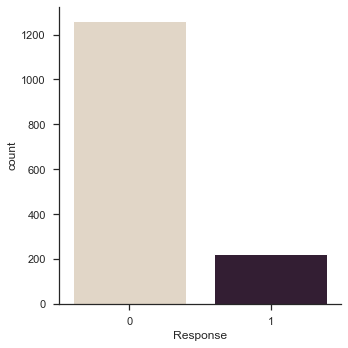

In [240]:
# Oversampling with SMOTE for Train Set
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=X_train)

X_train.groupby(['Response']).agg({'Response':'count'})

In [241]:
os = SMOTE(random_state=0, k_neighbors=5)
os = ADASYN(random_state=0,n_neighbors=5)
os_X,os_y =os.fit_resample(X_train, X_train.Response)

,Response
Response,
0,1261
1,1288


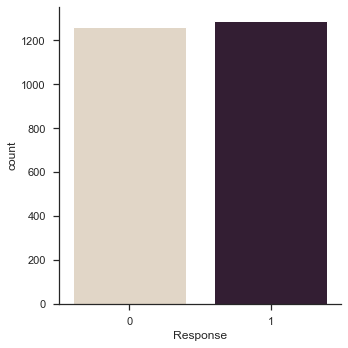

In [242]:
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=os_X)
os_X.groupby(['Response']).agg({'Response':'count'})

In [243]:
X_train = os_X.drop("Response",axis = 1)
y_train = os_y # Response

In [244]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [245]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.68615143193409 % and k = [1]


In [246]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.52220726783311 % and k = [2]


C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



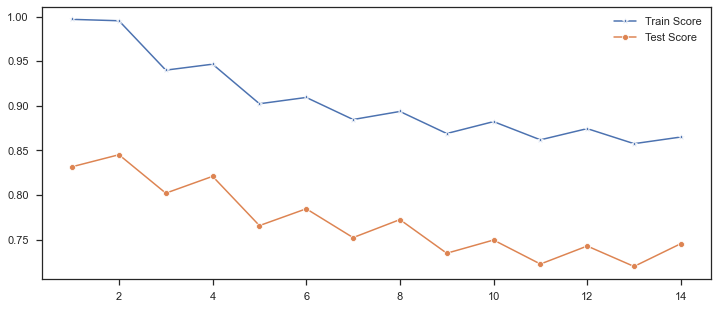

In [247]:
# Result Visual
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 2, therefore 2 is used for the final model

In [248]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train)
knn.score(X_test,y_test) #accuracy

0.845222072678331

###### Model Performance Analysis

1. Confusion Matrix

In [250]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,566,66,632
1,49,62,111
All,615,128,743


Text(0.5, 22.5, 'Predicted label')

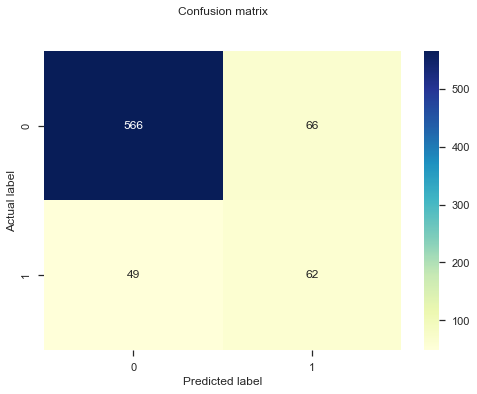

In [251]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

Precision Score TP – True Positives FP – False Positives

Precision – Accuracy of positive predictions. Precision = TP/(TP + FP)

-----------------------------------------------
Recall Score FN – False Negatives

Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified. Recall = TP/(TP+FN)

--------------------------------------------------
F1 Score F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)

In [252]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       632
           1       0.48      0.56      0.52       111

    accuracy                           0.85       743
   macro avg       0.70      0.73      0.71       743
weighted avg       0.86      0.85      0.85       743



In [253]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

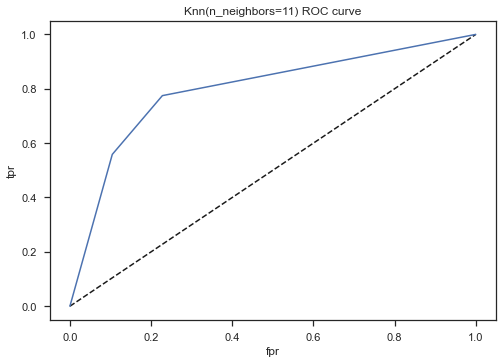

In [254]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [255]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7966415782871479

Hyper Parameter optimization

In [256]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8720259988915201
Best Parameters: {'n_neighbors': 25}


# KNN With Clustering Attribute Without PCA

In [257]:
clus_with_pca = data.copy()
clus_with_pca

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size
0,1,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3701,0,1617,0,25,65,1
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2855,2,27,0,6,68,3
2,1,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3202,0,776,0,21,57,2
3,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2795,1,53,0,8,38,3
4,3,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3051,1,422,0,19,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,1,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3271,1,1341,0,18,55,3
2223,3,0,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,2791,3,444,1,22,76,5
2224,1,1,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3045,0,1241,1,19,41,1
2225,2,0,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3046,1,843,0,23,66,3


In [258]:
# Standardization

for i in clus_with_pca.select_dtypes(exclude='object').columns:
    clus_with_pca.loc[:, i] = StandardScaler().fit_transform(np.array(clus_with_pca[[i]]))

clus_with_pca.shape
# Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance)

(2227, 28)

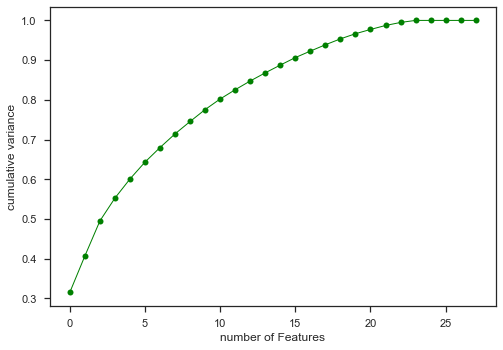

In [259]:
# we use this method for reducing the dimentionality of the dataset. What we mean by dimention here means the different features 
# So using PCA, we will be able to cluster similar data points based on their feature correlation 
# The question here can be how to define the number of components in PCA; meaning that how can we estimate that how many features 
# are enough to describe the data. To do this, we use cumulative variance ratio 
# For more information You can check this link: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html#:~:text=Choosing%20the%20number%20of%20components,pca%20%3D%20PCA().
from sklearn.decomposition import PCA
pca = PCA().fit(clus_with_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'o-', linewidth=1, color='green')
plt.xlabel('number of Features')
plt.ylabel('cumulative variance');
plt.show()

#As it can be seen, around 10 or 11 features have 80% of the information. So we will use these 10 features for clustering.

In [260]:
pca = PCA(n_components = 0.75)
pca.fit(clus_with_pca)
principal_features = pd.DataFrame(pca.transform(clus_with_pca), columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"
                                                               , "Feature 6", "Feature 7", "Feature 8", "Feature 9", "Feature 10"])
print("We have",len(principal_features.columns), "principal features")
principal_features.head()

We have 10 principal features


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10
0,4.604891,-1.379172,-0.574837,3.487584,-0.349982,0.110904,-0.097498,-0.444597,-2.152011,1.021130
1,-2.932281,0.423335,-0.717693,-1.041793,-0.810714,-0.650823,0.873062,2.053121,-1.018910,0.128566
2,1.788008,-1.332170,-0.797588,-0.244514,0.028518,0.085739,-0.888456,0.542745,0.920952,0.777300
3,-2.914479,0.578338,-1.015788,-0.726680,0.867390,-0.076978,-0.724710,1.009321,1.267760,-0.698338
4,-0.334098,-1.191473,0.580382,-0.923469,-0.039666,0.117043,0.630545,-1.121551,0.942881,-1.499816


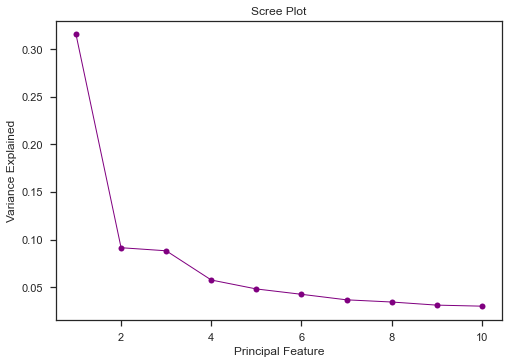

In [261]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='purple')
plt.title('Scree Plot')
plt.xlabel('Principal Feature')
plt.ylabel('Variance Explained')
plt.show()

# Elbow Method

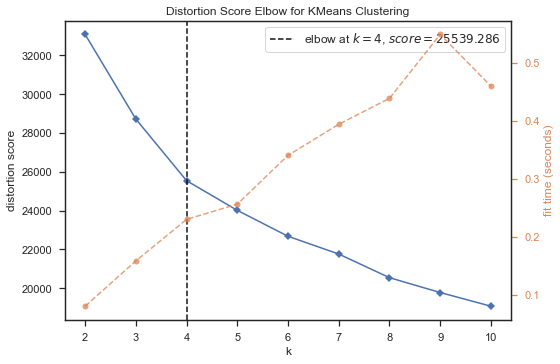

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [262]:
# import KMeans
from sklearn.cluster import KMeans
# Elbow Method is used for finding the best K in KMeans. 
# we use elbow method for finding the good k number of clusters. with each additional cluster the summed distance between the points and the cluster center becomes smaller. However, there is a optimum number for k after which, the addisitonal cluster reduces the summed distance only slightly. We pick this number for the clusters.
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(principal_features)
elbow.show()

In [263]:
clusters = KMeans(n_clusters=4, random_state=50).fit(principal_features)
data_Kmeans = clus_with_pca.copy()
Cluster_Analysis_with_pca = data.copy()
Cluster_Analysis_with_pca["Clusters"]= clusters.labels_

In [264]:
Cluster_Analysis_with_pca

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Clusters
0,1,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,3701,0,1617,0,25,65,1,3
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2855,2,27,0,6,68,3,0
2,1,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3202,0,776,0,21,57,2,3
3,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,2795,1,53,0,8,38,3,0
4,3,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3051,1,422,0,19,41,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,1,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3271,1,1341,0,18,55,3,3
2223,3,0,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,2791,3,444,1,22,76,5,2
2224,1,1,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3045,0,1241,1,19,41,1,3
2225,2,0,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3046,1,843,0,23,66,3,2


In [265]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(Cluster_Analysis_with_pca.drop(["Response","Clusters"],axis = 1),),
        columns=['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Customer_date', 'Kids', 'Expenses', 'Accepted', 'Purchases', 'Age', 'Family_Size'])

In [266]:
X['Clusters'] = Cluster_Analysis_with_pca.Clusters

In [267]:
y = Cluster_Analysis_with_pca.Response

In [268]:
#Stratified train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

In [269]:
X_train['Response'] = y_train

,Response
Response,
0,1261
1,223


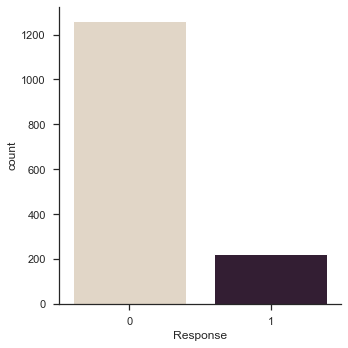

In [270]:
# Oversampling with SMOTE for Train Set
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=X_train)

X_train.groupby(['Response']).agg({'Response':'count'})

In [271]:
os = SMOTE(random_state=0, k_neighbors=5)
os = ADASYN(random_state=0,n_neighbors=5)
os_X,os_y =os.fit_resample(X_train, X_train.Response)

,Response
Response,
0,1261
1,1285


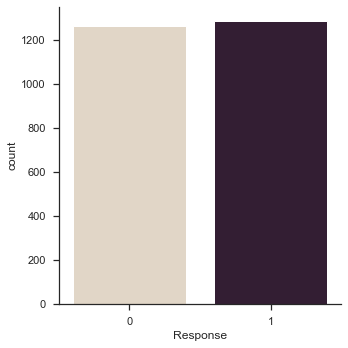

In [272]:
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=os_X)
os_X.groupby(['Response']).agg({'Response':'count'})

In [273]:
X_train = os_X.drop("Response",axis = 1)

In [274]:
y_train = os_y # Response

In [275]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [276]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))


Max train score 99.72505891594659 % and k = [1]


In [277]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 84.79138627187079 % and k = [2]


C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\KayaBennur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



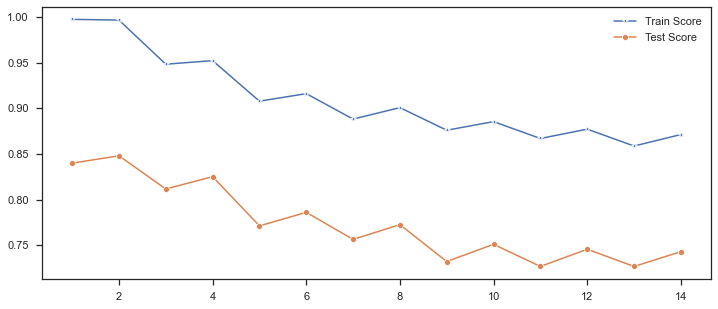

In [278]:
# Result Visual
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 2, therefore 2 is used for the final model

In [279]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.847913862718708

#### Model Performance Analysis

1. Confusion Matrix

In [280]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,572,60,632
1,53,58,111
All,625,118,743


Text(0.5, 22.5, 'Predicted label')

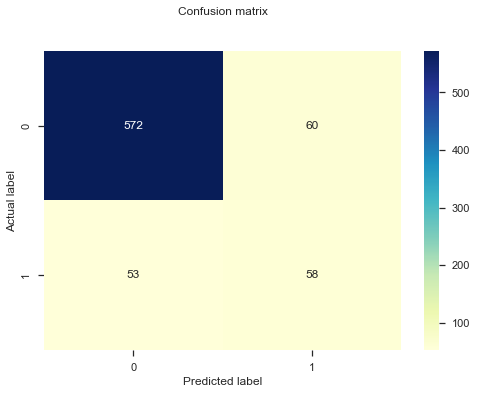

In [281]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [282]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       632
           1       0.49      0.52      0.51       111

    accuracy                           0.85       743
   macro avg       0.70      0.71      0.71       743
weighted avg       0.85      0.85      0.85       743



In [283]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

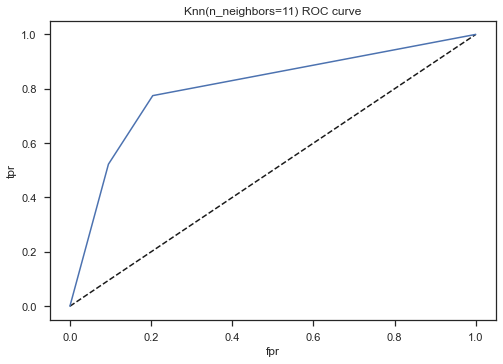

In [284]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [285]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# 0.9389906816557925 for PCA when 0.75

0.8018802029877979

Hyper Parameter optimization

In [286]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.871126114778052
Best Parameters: {'n_neighbors': 45}
